# Project Review 3

# Support Vector Machines Regression, Predicting Base Count based on given cvssV2 Values

# Jaron Dunham

## Import Files

In [1]:
import json 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from fig_code.figures import *
from sklearn.linear_model import LinearRegression
from pandas.io.json import json_normalize

with open("nvdcve-1.1-recent.json") as f:
    d = json.load(f)

In [2]:
nvd_file_type = '.json'

## Obtain nessesary columns

In [3]:
#def import_nvd(nvd_start=2, nvd_end=20):
def import_nvd(nvd_start=18, nvd_end=20):    
    for i in range(nvd_start,nvd_end):
        
        year = '20'+str(i).zfill(2)
        path = 'nvdcve-1.1-'+year+nvd_file_type
        
        if (year != "2010"):
            if (year != "2014"):
                with open(path) as f:
                    d = json.load(f)
            
        CVE = json_normalize(d["CVE_Items"]) 
        newCVE = CVE[['impact.baseMetricV2.cvssV2.version',
                      'impact.baseMetricV2.cvssV2.vectorString',
                      'impact.baseMetricV2.cvssV2.accessVector',
                      'impact.baseMetricV2.cvssV2.accessComplexity',
                      'impact.baseMetricV2.cvssV2.authentication',
                      'impact.baseMetricV2.cvssV2.confidentialityImpact',
                      'impact.baseMetricV2.cvssV2.integrityImpact',
                      'impact.baseMetricV2.cvssV2.availabilityImpact',
                      'impact.baseMetricV2.cvssV2.baseScore',]]
        
    return newCVE

## Rename Columns

In [4]:
CVE = import_nvd()

for col in CVE.columns: 
    newCol = col[27:]
    CVE.rename(columns = {col:newCol}, inplace = True) 

## Process Data

In [5]:
print(CVE.head(5).keys)

<bound method NDFrame.keys of   version                vectorString accessVector accessComplexity  \
0     2.0  AV:N/AC:M/Au:N/C:N/I:N/A:C      NETWORK           MEDIUM   
1     2.0  AV:N/AC:L/Au:N/C:P/I:P/A:P      NETWORK              LOW   
2     2.0  AV:N/AC:M/Au:N/C:N/I:N/A:P      NETWORK           MEDIUM   
3     2.0  AV:L/AC:L/Au:N/C:P/I:N/A:N        LOCAL              LOW   
4     2.0  AV:N/AC:L/Au:N/C:N/I:P/A:N      NETWORK              LOW   

  authentication confidentialityImpact integrityImpact availabilityImpact  \
0           NONE                  NONE            NONE           COMPLETE   
1           NONE               PARTIAL         PARTIAL            PARTIAL   
2           NONE                  NONE            NONE            PARTIAL   
3           NONE               PARTIAL            NONE               NONE   
4           NONE                  NONE         PARTIAL               NONE   

   baseScore  
0        7.1  
1        7.5  
2        4.3  
3        2.1  
4    

Any rows with nan values have been removed and Base Score has been moved to its own dataframe

In [6]:
CVE = CVE.dropna()
a = CVE.iloc[:,:-1] #all but base score
b = CVE.iloc[:,8:] #only base score

In [7]:
print(a.head(5))

  version                vectorString accessVector accessComplexity  \
0     2.0  AV:N/AC:M/Au:N/C:N/I:N/A:C      NETWORK           MEDIUM   
1     2.0  AV:N/AC:L/Au:N/C:P/I:P/A:P      NETWORK              LOW   
2     2.0  AV:N/AC:M/Au:N/C:N/I:N/A:P      NETWORK           MEDIUM   
3     2.0  AV:L/AC:L/Au:N/C:P/I:N/A:N        LOCAL              LOW   
4     2.0  AV:N/AC:L/Au:N/C:N/I:P/A:N      NETWORK              LOW   

  authentication confidentialityImpact integrityImpact availabilityImpact  
0           NONE                  NONE            NONE           COMPLETE  
1           NONE               PARTIAL         PARTIAL            PARTIAL  
2           NONE                  NONE            NONE            PARTIAL  
3           NONE               PARTIAL            NONE               NONE  
4           NONE                  NONE         PARTIAL               NONE  


In [8]:
print(b.head(5))

   baseScore
0        7.1
1        7.5
2        4.3
3        2.1
4        5.0


We will be converting any columns with strings into integers, this is done get the total amount of unique strings and then giving them all a different number to be assosiated by

In [9]:
def toNumbers(columnName,column,cve):
    for x in range(len(column)):
        #column[x] = x
        #print("X: " + str(x) + " - Variable: " + str(column[x]))
        cve[columnName] = cve[columnName].replace(column[x],int(x)) 
    return cve

In [10]:
columns = list(a.columns) 
print(columns)
version = CVE.version.unique()
vectorString = CVE.vectorString.unique()
accessVector = CVE.accessVector.unique()
accessComplexity = CVE.accessComplexity.unique()
authentication = CVE.authentication.unique()
confidentialityImpact = CVE.confidentialityImpact.unique()
integrityImpact = CVE.integrityImpact.unique()
availabilityImpact = CVE.availabilityImpact.unique()
a = toNumbers(columns[0],version,a)
a = toNumbers(columns[1],vectorString,a)
a = toNumbers(columns[2],accessVector,a)
a = toNumbers(columns[3],accessComplexity,a)
a = toNumbers(columns[4],authentication,a)
a = toNumbers(columns[5],confidentialityImpact,a)
a = toNumbers(columns[6],integrityImpact,a)
a = toNumbers(columns[7],availabilityImpact,a)

['version', 'vectorString', 'accessVector', 'accessComplexity', 'authentication', 'confidentialityImpact', 'integrityImpact', 'availabilityImpact']


In [11]:
a.head()

,version,vectorString,accessVector,accessComplexity,authentication,confidentialityImpact,integrityImpact,availabilityImpact
0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1
2,0,2,0,0,0,0,0,1
3,0,3,1,1,0,1,0,2
4,0,4,0,1,0,0,1,2


In [12]:
testA = a.iloc[:8000,:]
testB = b.iloc[:8000,:]

In [13]:
testB.shape

(8000, 1)

In [14]:
testA.shape

(8000, 8)

Simple plot to see if there is any visible corolation 

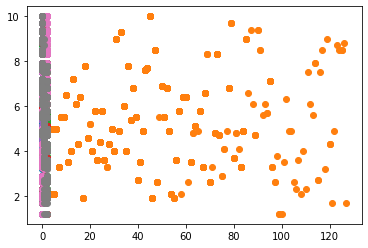

In [15]:
plt.plot(testA,testB,'o')

For my machine learning, I used a type of Regression called Support Vector Machines  

In [17]:
from sklearn import svm

In [18]:
clf = svm.SVR()
>>> clf.fit(testA, testB) 

C:\Users\Chase\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chase\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Now we can put in an input to see if we can predict an output

In [21]:
new_input = [[0.0 ,0 ,0.0 ,0 ,0 ,0,0 ,0.0]]
new_output = clf.predict(new_input)
print(new_input, new_output)

[[0.0, 0, 0.0, 0, 0, 0, 0, 0.0]] [6.99966869]


In [20]:
new_input = [[0.0 ,1 ,0.0 ,1 ,0 ,1,1 ,1.0]]
new_output = clf.predict(new_input)
print(new_input, new_output)

[[0.0, 1, 0.0, 1, 0, 1, 1, 1.0]] [7.39992293]


In [22]:
new_input = [[0.0 ,2 ,0.0 ,0 ,0 ,0,0 ,1.0]]
new_output = clf.predict(new_input)
print(new_input, new_output)

[[0.0, 2, 0.0, 0, 0, 0, 0, 1.0]] [4.40002353]


In [23]:
new_input = [[0.0 ,3 ,1.0 ,1 ,0 ,1,0 ,2.0]]
new_output = clf.predict(new_input)
print(new_input, new_output)

[[0.0, 3, 1.0, 1, 0, 1, 0, 2.0]] [2.19961703]


In [24]:
new_input = [[0.0 ,4 ,0.0 ,1 ,0 ,0,1 ,2.0]]
new_output = clf.predict(new_input)
print(new_input, new_output)

[[0.0, 4, 0.0, 1, 0, 0, 1, 2.0]] [4.9000196]


Use the inputs from the first couple rows, the ouputs we get seem to at most be about 1 and a half points off, but nothing too drastic 